In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Simulate the Number of Heads in 100 Tosses ###

In [3]:
coin = ['heads', 'tails']

In [4]:
np.random.choice(coin)

'tails'

In [5]:
tosses = np.random.choice(coin, 100)
tosses

array(['heads', 'tails', 'tails', 'tails', 'heads', 'heads', 'tails',
       'heads', 'heads', 'tails', 'tails', 'heads', 'heads', 'heads',
       'tails', 'heads', 'tails', 'heads', 'heads', 'tails', 'tails',
       'tails', 'tails', 'heads', 'heads', 'tails', 'heads', 'heads',
       'tails', 'tails', 'tails', 'heads', 'heads', 'tails', 'tails',
       'heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'tails',
       'tails', 'tails', 'tails', 'tails', 'tails', 'tails', 'heads',
       'tails', 'heads', 'tails', 'tails', 'heads', 'heads', 'tails',
       'heads', 'heads', 'tails', 'heads', 'tails', 'tails', 'heads',
       'heads', 'tails', 'tails', 'heads', 'heads', 'heads', 'heads',
       'tails', 'heads', 'heads', 'heads', 'tails', 'heads', 'tails',
       'tails', 'heads', 'tails', 'tails', 'tails', 'heads', 'heads',
       'tails', 'heads', 'heads', 'heads', 'heads', 'tails', 'heads',
       'heads', 'tails', 'tails', 'heads', 'tails', 'tails', 'tails',
       'heads', 'hea

In [6]:
sum(tosses == 'heads')

49

In [29]:
def num_heads():
    flips = np.random.choice(coin, 100)
    return np.count_nonzero(flips == 'heads')

In [30]:
num_heads()

51

In [31]:
repetitions = 10000

In [34]:
outcomes = make_array()

for i in np.arange(repetitions):
    heads = num_heads()
    outcomes = np.append(outcomes, heads)

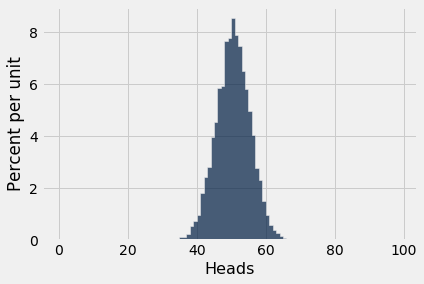

In [36]:
results = Table().with_column('Heads', outcomes)
results.hist('Heads', bins=np.arange(0, 100))

# Probability

Have 3 cards, green red and blue. For drawing two cards (without replacing the first one), there are six possible outcomes that are equally likely.

G --> R

G --> B

R --> G

R --> B

B --> G

B --> R

In [39]:
# chance of green on first draw and then red

1/3 * 1/2

0.16666666666666666

In [1]:
# P(at least one Head in 3 tosses)
P_TTT = 1/2 * 1/2 * 1/2
1. - P_TTT

0.875

In [3]:
# P(at least one Head in 10 tosses)
P_T10 = (1/2) ** 10
1. - P_T10

0.9990234375

# Sampling

In [13]:
top = Table.read_table('top_movies.csv')
top = top.with_column('Row', np.arange(top.num_rows)).move_to_start('Row')
top

Row,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [14]:
top.take(make_array(3,5,8)) # deterministic

Row,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015


In [15]:
top.where('Title',are.containing('and the')) # deterministic

Row,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),291710957,393033100,2005
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991


In [16]:
# is this deterministic or probabilistic? 
# (probability smaple -- can find out the probability of getting any of these rows)
start = np.random.choice(np.arange(10))
top.take(np.arange(start,200,10))

Row,Title,Studio,Gross,Gross (Adjusted),Year
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
14,The Lion King,Buena Vista (Disney),422783777,775573900,1994
24,Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
34,The Hunger Games: Mockingjay - Part 1,Lionsgate,337135885,354324000,2014
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
64,Home Alone,Fox,285761243,589287500,1990
74,Night at the Museum,Fox,250863268,322261900,2006
84,Beverly Hills Cop,Paramount,234760478,584205200,1984
94,Saving Private Ryan,Dreamworks,216540909,397999500,1998


In [18]:
# can just get 5 random rows
top.sample(5, with_replacement=False) # this is a uniform random sample

Row,Title,Studio,Gross,Gross (Adjusted),Year
19,Jurassic Park,Universal,402453882,799721000,1993
170,Fantasia,Disney,76408097,722478200,1941
142,On Golden Pond,Universal,119285432,353083700,1981
122,Batman Returns,Warner Bros.,162831698,341358000,1992
147,Doctor Zhivago,MGM,111721910,1079978500,1965


# Probability Distribution

In [21]:
die = Table().with_column('face',np.arange(1,7))
die

face
1
2
3
4
5
6


In [22]:
die.sample(1)

face
3


In [23]:
die.with_column('probability', 1/6)

face,probability
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


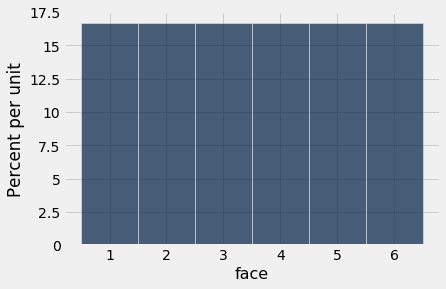

In [25]:
# The probability distribution of die faces
die.hist('face', bins=np.arange(0.5,7,1))

# Emperical Distrbution

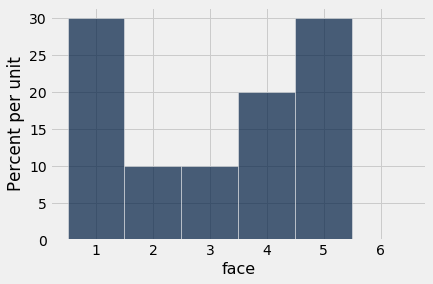

In [26]:
die.sample(10).hist('face',bins=np.arange(0.5,7,1))

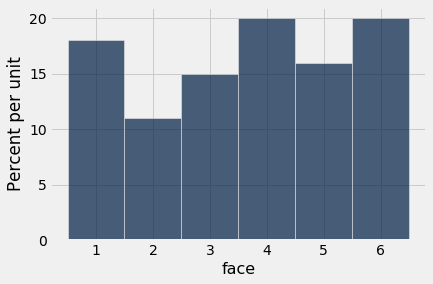

In [27]:
die.sample(100).hist('face',bins=np.arange(0.5,7,1))

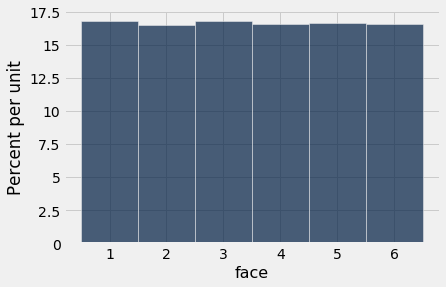

In [29]:
die.sample(100000).hist('face',bins=np.arange(0.5,7,1))